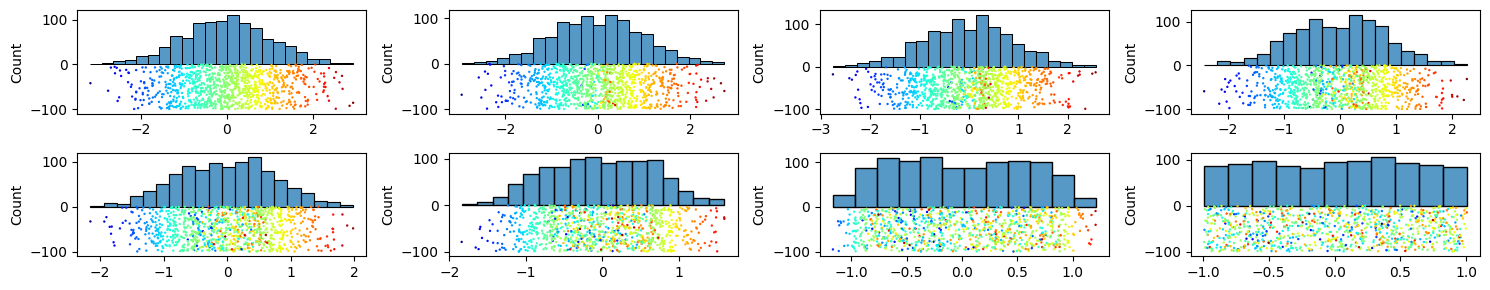

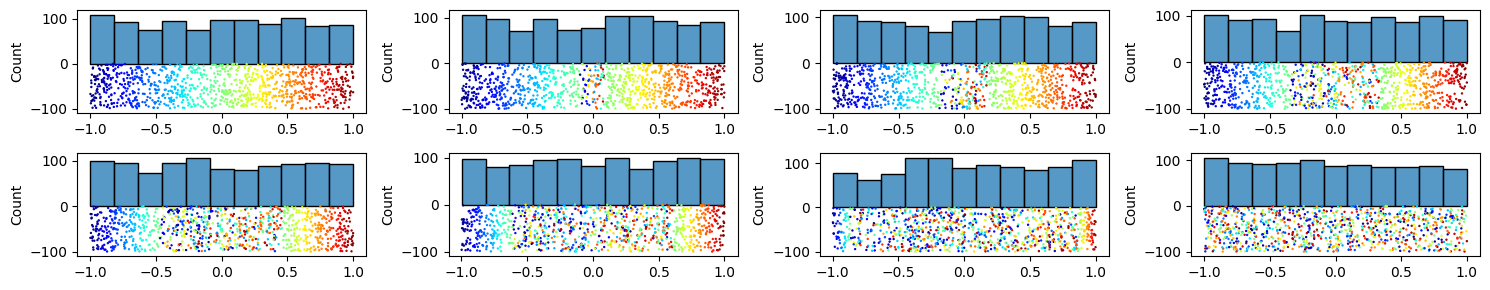

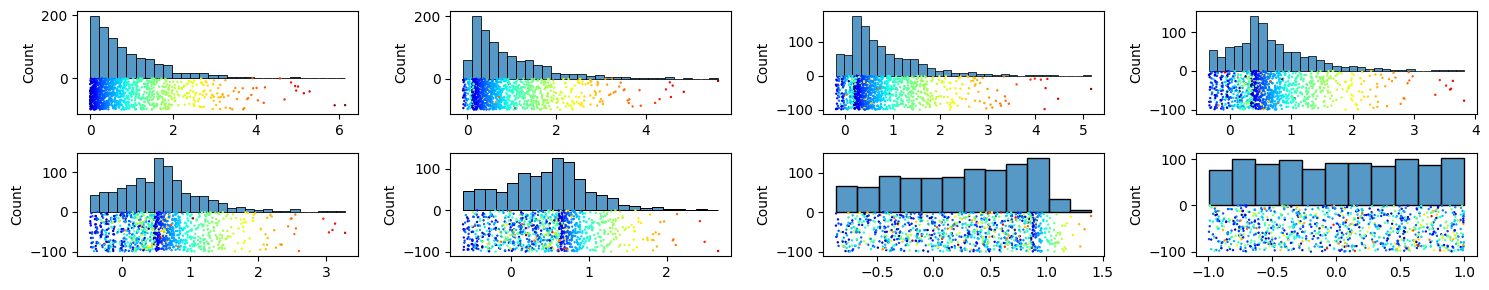

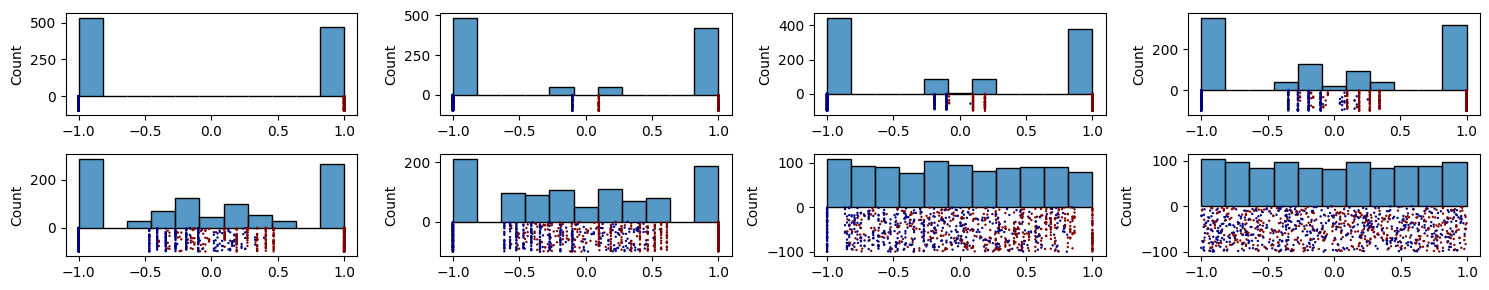

In [78]:
from typing import Any
import numpy as np
from scipy.spatial import cKDTree, Voronoi, ConvexHull, voronoi_plot_2d
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd



N = 1000
funcs = [
lambda: np.random.normal(0,1, size=N),
lambda: np.random.random(size=N)*2 -1,
lambda: np.random.exponential(size=N),
lambda: np.sign(np.random.random(size=N)-0.5),
]
p_swap = 1
p_swap2 = 0.1
for f in funcs:
    X = f()
    c = X.copy()
    if np.all(c>0):
        c = np.sqrt(c)
    plot_iters = [1, 2, 3, 5, 7, 10, 20, 50]
    fig, axes = plt.subplots(2, (1+len(plot_iters))//2, figsize=(15,3))
    axes = axes.flatten()
    i_ax =0
    for i_iter in range(1, plot_iters[-1]+1):
        masks = np.random.choice(3, size=len(X), p=[1-p_swap, p_swap*(1-p_swap2), p_swap*p_swap2])
        if i_iter in plot_iters:
            sns.histplot(X, ax=axes[i_ax])
            # Show colors:
            axes[i_ax].scatter(X, -100*np.random.rand(len(X)), c=c, cmap='jet', marker='.', s=2)
            # axes[i_ax].get_ylims
            i_ax += 1
        # masks[masks==2] = 1
        X[masks==1] = X[masks==1]*(1-p_swap2) + np.sign(X[masks==1]) * p_swap2
        X[masks==2] = X[masks==2]*2*p_swap2 - p_swap2 * np.sign(X[masks==2])
    plt.tight_layout()
    plt.show()
